## Observations and Insights 


-Their is a strong positive correlation between weight of the mouse tested and average
tumor volume which implies that the heavier the mouse is the lower the efficacy of the
drug

-Capomulin and Ramicane were clearly the most effective treatments for reducing tumor size

-Of the four most promising drug regimens Infubinol was the only treatment wiht an outlier, otherwise the data was quite consistent

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merging on "Mouse ID" column
combined_data=pd.merge(mouse_metadata, study_results,how="outer",on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [92]:
# Checking the number of mice.
combined_data["Mouse ID"].count()


1893

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data=combined_data.drop_duplicates(["Mouse ID", "Timepoint"],keep='first')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
# Checking the number of mice in the clean DataFrame.
#call length of all unique values in mouse id column to find number of individuals
len(combined_data["Mouse ID"].unique())


249

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_summary = combined_data.groupby('Drug Regimen')

tumor_mean = regimen_summary['Tumor Volume (mm3)'].mean()
tumor_median = regimen_summary['Tumor Volume (mm3)'].median()
tumor_stdev = regimen_summary['Tumor Volume (mm3)'].std()
tumor_variance = (tumor_stdev**2)
tumor_SEM = regimen_summary['Tumor Volume (mm3)'].sem()

regimen_summary_df = pd.DataFrame({"Mean":tumor_mean,
                                   "Median":tumor_median,
                                   "Variance":tumor_variance,
                                   "Standard Deviation":tumor_stdev,
                                   "SEM":tumor_SEM
                                  })
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#.agg function simplifies the method for producing the above summary table
regimen_summary_aggregate = combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
regimen_summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

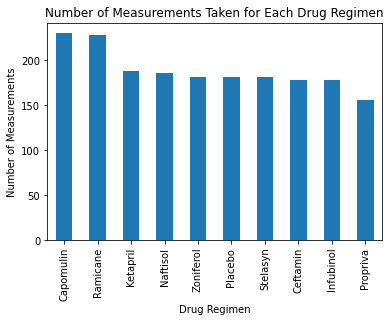

In [97]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#value counts funciton used ot show total measurements taken 
pandas_bar = combined_data['Drug Regimen'].value_counts().plot.bar(width=0.5)

#Chart Labels
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Measurements")
pandas_bar.set_title("Number of Measurements Taken for Each Drug Regimen")

#display bar plot
plt.show()

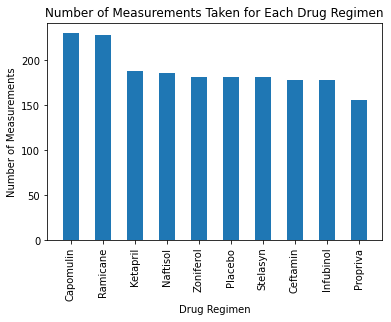

In [98]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#first find total measurements taken
total_measurements = combined_data['Drug Regimen'].value_counts()
#set x_axis equal to length of total_measurements series
x_axis = np.arange(len(total_measurements))

#Set parameters of the bar plot
plt.bar(x_axis, total_measurements, width = 0.5)
#add drug regimen data labels along x_axis from the index of total_measurements series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, total_measurements.index.values)

#Chart Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements Taken for Each Drug Regimen")
#allows drug regimen labels to be read
plt.xticks(rotation=90)
#displays bar plot
plt.show()

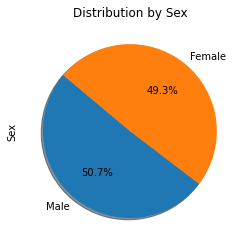

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#value counts of both sexes
sex_data = combined_data['Sex'].value_counts()
#plot pie chart using value count of sexes
pie_plot = sex_data.plot.pie(autopct="%1.1f%%", startangle=140,shadow=True, title='Distribution by Sex')
#display plot
plt.show()

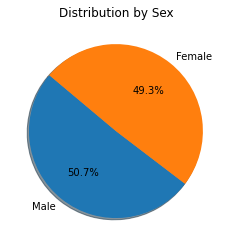

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.pie function used to create pie chart 
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution by Sex')
#display plot
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(combined_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Merging on "Mouse ID" column
merged_tumor_volume_df = pd.merge(combined_data,last_timepoint_df,on='Mouse ID')
merged_tumor_volume_df.sample(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
1461,r701,Naftisol,Male,21,25,0,45.000000,0,45
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
37,m601,Capomulin,Male,22,17,35,30.834357,1,45
1145,l725,Naftisol,Female,8,26,35,69.125702,3,45
801,e584,Naftisol,Male,9,27,0,45.000000,0,45
1055,k603,Propriva,Male,2,27,5,46.042116,0,20
976,j235,Placebo,Male,6,30,10,48.018788,1,20
1854,z314,Stelasyn,Female,21,28,5,45.934712,0,5
548,a699,Propriva,Female,5,28,35,56.510682,1,45
769,e213,Naftisol,Male,8,27,20,52.613763,2,45


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
treatment_values = []

for treatment in treatments:
    
    temporary_df = merged_tumor_volume_df.loc[merged_tumor_volume_df['Drug Regimen'] == treatment]
    final_tumor_volume_df = temporary_df.loc[temporary_df['Timepoint'] == temporary_df['Max Timepoint']]
#add values to prior list taken from final timepoint    
    values = final_tumor_volume_df['Tumor Volume (mm3)']
    treatment_values.append(values)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    # Determine outliers using upper and lower bounds
    outliers_count = (values.loc[(final_tumor_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
        (final_tumor_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


([<matplotlib.axis.XTick at 0x1c4000cc820>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

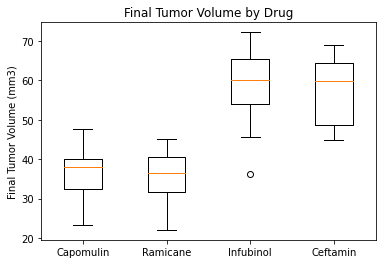

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(treatment_values)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

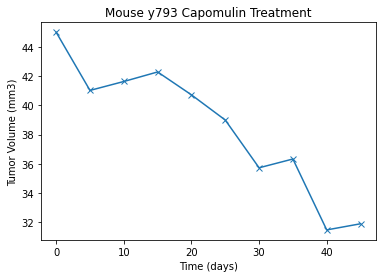

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#find specific mouse y793
mouse = combined_data.loc[combined_data['Mouse ID'] == "y793"]

#make and label line plot
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = "x")
plt.title("Mouse y793 Capomulin Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

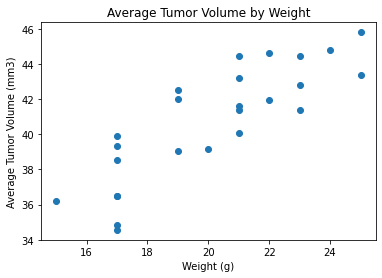

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment_df = combined_data.loc[combined_data['Drug Regimen']== 'Capomulin']
average_volume_df = pd.DataFrame(capomulin_treatment_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
#End up with new dataframe containing average tumor volume 
average_volume_df = pd.merge(capomulin_treatment_df, average_volume_df, on='Mouse ID')
final_average_volume_df = average_volume_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
#declare x and y values from new dataframe containing average tumor volume without duplicate values
x = final_average_volume_df['Weight (g)']
y = final_average_volume_df['Average Tumor Volume']
#plot x and y values on scatterplot
plt.scatter(x, y)
plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

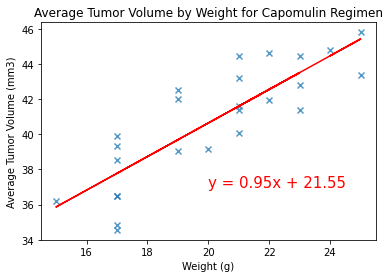

In [83]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#pull only data for the capomulin regimen
capomulin_treatment_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

average_volume_df = pd.DataFrame(capomulin_treatment_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
average_volume_df=pd.merge(capomulin_treatment_df,average_volume_df, on='Mouse ID')

final_average_volume_df = average_volume_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_average_volume_df

x = final_average_volume_df['Weight (g)']
y = final_average_volume_df['Average Tumor Volume']

#correlation using fuction from scipy.stats
correlation = st.pearsonr(x, y)
#regression values + standard line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot + annotated line displaying regression formula
plt.scatter(x,y,marker="x",alpha=.75)
plt.plot(x, regress_values, "red")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

#labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight for Capomulin Regimen')
plt.show()


